# Compare most stable genes

This notebook compares the core genes found to be most stable using the MR counts correlation matrix versus the SPELL-processed correlation matrix. Do we get consistent genes?

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import random
import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from scripts import utils, paths

random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Load version using raw expression data
pao1_similarity_scores_filename = "../pao1_similarity_scores.tsv"
pa14_similarity_scores_filename = "../pa14_similarity_scores.tsv"

pao1_similarity_scores = pd.read_csv(
    pao1_similarity_scores_filename, sep="\t", header=0, index_col=0
)
pa14_similarity_scores = pd.read_csv(
    pa14_similarity_scores_filename, sep="\t", header=0, index_col=0
)

In [3]:
# Load version using SPELL-processed expression data
pao1_similarity_scores_spell_filename = (
    "../pao1_core_similarity_associations_final_spell.tsv"
)
pa14_similarity_scores_spell_filename = (
    "../pa14_core_similarity_associations_final_spell.tsv"
)

pao1_similarity_scores_spell = pd.read_csv(
    pao1_similarity_scores_spell_filename, sep="\t", header=0, index_col=0
)
pa14_similarity_scores_spell = pd.read_csv(
    pa14_similarity_scores_spell_filename, sep="\t", header=0, index_col=0
)

In [4]:
# Merge scores across raw and SPELL-processed versions
pao1_raw_spell = pao1_similarity_scores.merge(
    pao1_similarity_scores_spell,
    left_index=True,
    right_index=True,
    suffixes=["_raw", "_spell"],
)
pa14_raw_spell = pa14_similarity_scores.merge(
    pa14_similarity_scores_spell,
    left_index=True,
    right_index=True,
    suffixes=["_raw", "_spell"],
)

Text(0.5, 0.98, 'PAO1 raw vs SPELL')

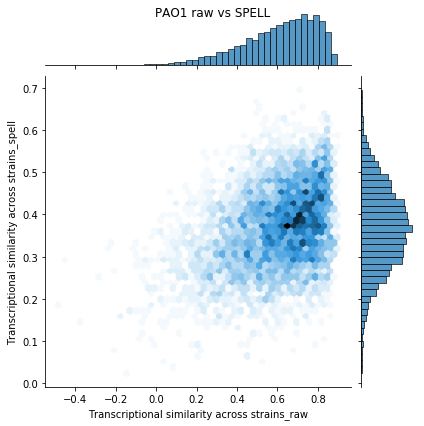

In [5]:
# Pairplot
sns.jointplot(
    data=pao1_raw_spell,
    x="Transcriptional similarity across strains_raw",
    y="Transcriptional similarity across strains_spell",
    kind="hex",
)
plt.suptitle("PAO1 raw vs SPELL")

Text(0.5, 0.98, 'PA14 raw vs SPELL')

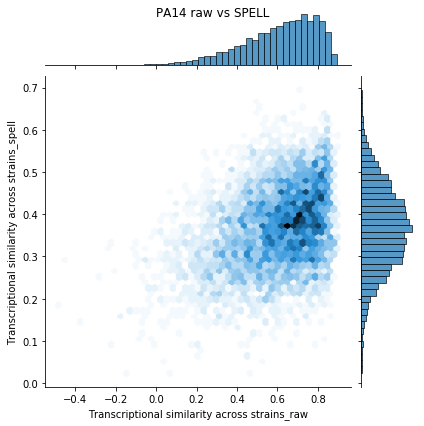

In [6]:
sns.jointplot(
    data=pa14_raw_spell,
    x="Transcriptional similarity across strains_raw",
    y="Transcriptional similarity across strains_spell",
    kind="hex",
)
plt.suptitle("PA14 raw vs SPELL")

In [7]:
# Get most stable genes
pao1_most_stable = pao1_similarity_scores[
    pao1_similarity_scores["label"] == "most stable"
].index
pao1_most_stable_spell = pao1_similarity_scores_spell[
    pao1_similarity_scores_spell["label"] == "most stable"
].index

pa14_most_stable = pa14_similarity_scores[
    pa14_similarity_scores["label"] == "most stable"
].index
pa14_most_stable_spell = pa14_similarity_scores_spell[
    pa14_similarity_scores_spell["label"] == "most stable"
].index

In [8]:
# Get least stable genes
pao1_least_stable = pao1_similarity_scores[
    pao1_similarity_scores["label"] == "least stable"
].index
pao1_least_stable_spell = pao1_similarity_scores_spell[
    pao1_similarity_scores_spell["label"] == "least stable"
].index

pa14_least_stable = pa14_similarity_scores[
    pa14_similarity_scores["label"] == "least stable"
].index
pa14_least_stable_spell = pa14_similarity_scores_spell[
    pa14_similarity_scores_spell["label"] == "least stable"
].index

Text(0.5, 1.0, 'PAO1 most stable')

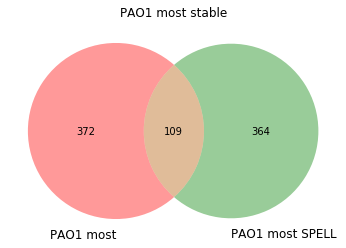

In [9]:
# Compare gene sets
venn2(
    [set(pao1_most_stable), set(pao1_most_stable_spell)],
    set_labels=("PAO1 most", "PAO1 most SPELL"),
)
plt.title("PAO1 most stable")

Text(0.5, 1.0, 'PA14 most stable')

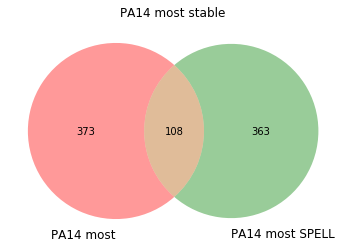

In [10]:
venn2(
    [set(pa14_most_stable), set(pa14_most_stable_spell)],
    set_labels=("PA14 most", "PA14 most SPELL"),
)
plt.title("PA14 most stable")

Text(0.5, 1.0, 'PAO1 least stable')

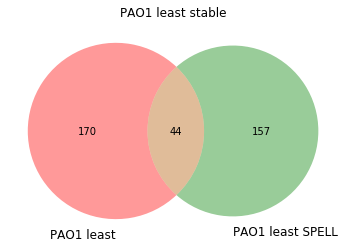

In [11]:
venn2(
    [set(pao1_least_stable), set(pao1_least_stable_spell)],
    set_labels=("PAO1 least", "PAO1 least SPELL"),
)
plt.title("PAO1 least stable")

Text(0.5, 1.0, 'PA14 least stable')

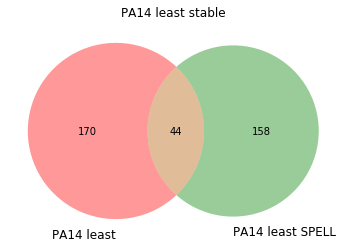

In [12]:
venn2(
    [set(pa14_least_stable), set(pa14_least_stable_spell)],
    set_labels=("PA14 least", "PA14 least SPELL"),
)
plt.title("PA14 least stable")

### Add label for genes that are shared by SPELL and counts data versus only in one or the other


In [13]:
# Who are the genes that are the same vs different?
pao1_most_shared_raw_spell_ids = list(
    set(pao1_most_stable).intersection(set(pao1_most_stable_spell))
)
pao1_most_raw_only_ids = list(
    set(pao1_most_stable).difference(set(pao1_most_stable_spell))
)
pao1_most_spell_only_ids = list(
    set(pao1_most_stable_spell).difference(set(pao1_most_stable))
)

pao1_least_shared_raw_spell_ids = list(
    set(pao1_least_stable).intersection(set(pao1_least_stable_spell))
)
pao1_least_raw_only_ids = list(
    set(pao1_least_stable).difference(set(pao1_least_stable_spell))
)
pao1_least_spell_only_ids = list(
    set(pao1_least_stable_spell).difference(set(pao1_least_stable))
)

In [14]:
pa14_most_shared_raw_spell_ids = list(
    set(pa14_most_stable).intersection(set(pa14_most_stable_spell))
)
pa14_most_raw_only_ids = list(
    set(pa14_most_stable).difference(set(pa14_most_stable_spell))
)
pa14_most_spell_only_ids = list(
    set(pa14_most_stable_spell).difference(set(pa14_most_stable))
)

pa14_least_shared_raw_spell_ids = list(
    set(pa14_least_stable).intersection(set(pa14_least_stable_spell))
)
pa14_least_raw_only_ids = list(
    set(pa14_least_stable).difference(set(pa14_least_stable_spell))
)
pa14_least_spell_only_ids = list(
    set(pa14_least_stable_spell).difference(set(pa14_least_stable))
)

In [15]:
pao1_similarity_scores["comparison"] = ""
pao1_similarity_scores.loc[
    pao1_most_shared_raw_spell_ids, "comparison"
] = "most stable in both"
pao1_similarity_scores.loc[
    pao1_most_raw_only_ids, "comparison"
] = "most stable in counts"
pao1_similarity_scores.loc[
    pao1_most_spell_only_ids, "comparison"
] = "most stable in SPELL"

pao1_similarity_scores.loc[
    pao1_least_shared_raw_spell_ids, "comparison"
] = "least stable in both"
pao1_similarity_scores.loc[
    pao1_least_raw_only_ids, "comparison"
] = "least stable in counts"
pao1_similarity_scores.loc[
    pao1_least_spell_only_ids, "comparison"
] = "least stable in SPELL"

In [16]:
pa14_similarity_scores["comparison"] = ""
pa14_similarity_scores.loc[
    pa14_most_shared_raw_spell_ids, "comparison"
] = "most stable in both"
pa14_similarity_scores.loc[
    pa14_most_raw_only_ids, "comparison"
] = "most stable in counts"
pa14_similarity_scores.loc[
    pa14_most_spell_only_ids, "comparison"
] = "most stable in SPELL"

pa14_similarity_scores.loc[
    pa14_least_shared_raw_spell_ids, "comparison"
] = "least stable in both"
pa14_similarity_scores.loc[
    pa14_least_raw_only_ids, "comparison"
] = "least stable in counts"
pa14_similarity_scores.loc[
    pa14_least_spell_only_ids, "comparison"
] = "least stable in SPELL"

In [17]:
# Save transcriptional similarity df
pao1_similarity_scores.to_csv("pao1_stable_genes_compare.tsv", sep="\t")
pa14_similarity_scores.to_csv("pa14_stable_genes_compare.tsv", sep="\t")

**Takeaway:**
Some consistency of most/least stable genes, but most are not consistent. By a manual inspection of the genes it looks like the SPELL and counts are picking up similar genes (i.e. similar function and location on the genome) but not the same exact genes ones.